In [1]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split
numpy.random.seed(10)

In [2]:
all_df = pd.read_csv("weather.csv")

In [3]:
all_df=all_df.drop(['RISK_MM'], axis=1)

In [4]:
X=all_df.drop(['RainTomorrow'], axis=1).values.astype('float64')

In [5]:
Y = all_df['RainTomorrow'].values.astype('int64')

In [6]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [8]:
model = Sequential()

In [9]:
model.add(Dense(units=26*8,   input_dim=13,
                kernel_initializer='uniform', 
                activation='relu'))

In [10]:
model.add(Dense(units=26*7,   
                kernel_initializer='uniform', 
                activation='relu'))

In [11]:
model.add(Dense(units=26*6,   
                kernel_initializer='uniform', 
                activation='relu'))

In [12]:
model.add(Dense(units=26*5,   
                kernel_initializer='uniform', 
                activation='relu'))

In [13]:
model.add(Dense(units=26*4,   
                kernel_initializer='uniform', 
                activation='relu'))

In [14]:
model.add(Dense(units=26*3,   
                kernel_initializer='uniform', 
                activation='relu'))

In [15]:
model.add(Dense(units=26*2,   
                kernel_initializer='uniform', 
                activation='relu'))

In [16]:
model.add(Dense(units=26,   
                kernel_initializer='uniform', 
                activation='relu'))

In [17]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 208)               2912      
_________________________________________________________________
dense_2 (Dense)              (None, 182)               38038     
_________________________________________________________________
dense_3 (Dense)              (None, 156)               28548     
_________________________________________________________________
dense_4 (Dense)              (None, 130)               20410     
_________________________________________________________________
dense_5 (Dense)              (None, 104)               13624     
_________________________________________________________________
dense_6 (Dense)              (None, 78)                8190      
_________________________________________________________________
dense_7 (Dense)              (None, 52)                4108      
__________

In [19]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [20]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 86104 samples, validate on 9568 samples
Epoch 1/30
86104/86104 [==============================] - 9s 102us/step - loss: 0.5939 - acc: 0.7816 - val_loss: 0.4167 - val_acc: 0.7774
Epoch 2/30
86104/86104 [==============================] - 6s 68us/step - loss: 0.3809 - acc: 0.8062 - val_loss: 0.3644 - val_acc: 0.8436
Epoch 3/30
86104/86104 [==============================] - 6s 69us/step - loss: 0.3468 - acc: 0.8536 - val_loss: 0.3540 - val_acc: 0.8469
Epoch 4/30
86104/86104 [==============================] - 7s 83us/step - loss: 0.3409 - acc: 0.8555 - val_loss: 0.3540 - val_acc: 0.8493
Epoch 5/30
86104/86104 [==============================] - 6s 64us/step - loss: 0.3396 - acc: 0.8555 - val_loss: 0.3487 - val_acc: 0.8505
Epoch 6/30
86104/86104 [==============================] - 6s 67us/step - loss: 0.3367 - acc: 0.8563 - val_loss: 0.3480 - val_acc: 0.8501
Epoch 7/30
86104/86104 [==============================] - 6s 68us/step - loss: 0.3353 - acc: 0.8572 - val_loss: 0.3471 - val_acc

In [21]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

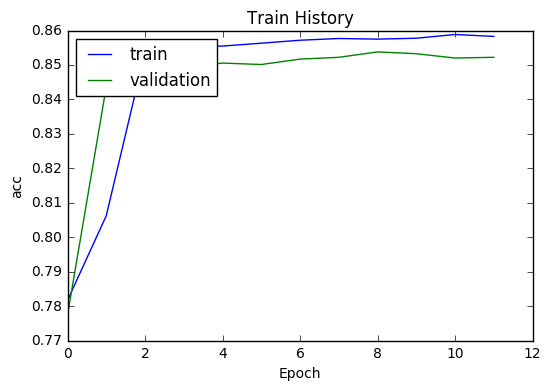

In [22]:
show_train_history(train_history,'acc','val_acc')

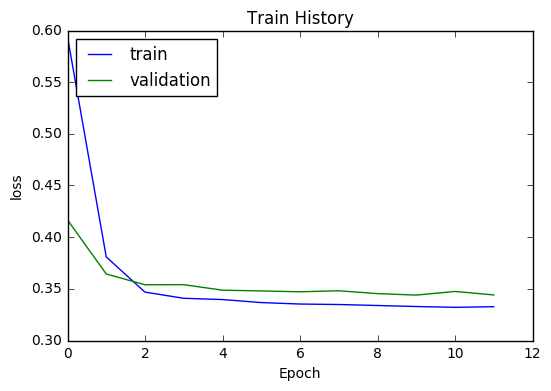

In [23]:
show_train_history(train_history,'loss','val_loss')

In [24]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

23918/23918 [==============================] - 2s 74us/step


In [25]:
scores[1]

0.856760598712267